In [2]:
# embedding analysis


# get embeddings of same words
# compare that with other different word
# look at the variance too?


In [3]:
# read all the words and save in a a datastructure
# dictionary with array?

# readin and append to 
# similar technique to what I did for dataset
# calculate offset for file and save
# No we don't even need this thing
# Then just read through each txt file and record the mapping-> easy peasy
# default dict withl list and keep appending
# check simple anaylsis on most common words
# check for its variance compared to randomly chosen word

In [4]:
import os
import numpy as np
import torch
import torch.nn as nn

from collections import defaultdict
from IPython.display import Audio
from python_speech_features import mfcc
from model import *



In [5]:
def create_word_mapper(data_dir, word_dir):
    mapper = defaultdict(list)
    mapper['meta'] = [data_dir, word_dir]
    
    fns = [npz[: -4] for npz in os.listdir(data_dir) if npz[-4: ] == '.npz']
    
    for fn in fns:
        data = np.load(os.path.join(data_dir, f'{fn}.npz'))
        with open(os.path.join(word_dir, f'{fn}.txt'), 'r') as txt:
            ws = txt.read().split()
        for i, w in enumerate(ws):
            mapper[w].append((fn, i))
    return mapper


# def word2wav(word, idx, mapper):
#     """Helper function for get_embedding"""
#     data_dir = mapper['meta'][0]
#     fn, i = mapper[word.upper()][idx]
#     wav = np.load(os.path.join(data_dir, f'{fn}.npz'))[f'arr_{i}']
#     return wav

def get_embedding(word, model, mapper, method='all'):
    """
    Parameter:
        method - one of the followings: 'all', 'average', 'first'
    """
    assert method in ['all', 'average', 'first'], f"{method} is invalid option"
    assert word.isupper(), f"{word} should be all upper case"
    assert word in mapper, f"{word} does not exist in mapper"
    
    data_dir, word_dir = mapper['meta'][0], mapper['meta'][1]
    wavs = []
    for fn, i in mapper[word]:
        wav = np.load(os.path.join(data_dir, f'{fn}.npz'))[f'arr_{i}']
        wavs.append(wav)
        if method == 'first':
            break
    
    x_n = [torch.tensor(mfcc(wav)).float() for wav in wavs]
    embedding = model.embed(x_n)
    if method == 'average':
        embedding = embedding.mean(dim=0, keepdim=True)
    return embedding
    

In [6]:
mapper = create_word_mapper('data/', 'data_mapping/')
data_dir, word_dir = mapper['meta'][0], mapper['meta'][1]

boys = mapper['BOY']
fn, i = boys[1]
wav = np.load(os.path.join(data_dir, f'{fn}.npz'))[f'arr_{i}']
Audio(wav, rate=16000)

In [44]:
model = Speech2Vec().float()
ckpt = torch.load('ckpt/6.pt')
model.load_state_dict(ckpt['state_dict'])


<All keys matched successfully>

In [45]:

boy = get_embedding('BOY', model, mapper, method='all')
girl = get_embedding('GIRL', model, mapper, method='all')
# get_embedding('BOY', model, mapper, method='all').shape

In [46]:
lbl = [0] * boy.size(0) + [1] * girl.size(0)
emb = torch.cat((boy, girl), dim=0).numpy()

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)


In [48]:
p_emb = pca.fit_transform(emb)

In [49]:
import matplotlib.pyplot as plt


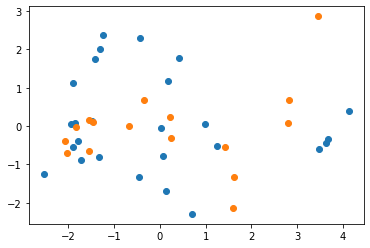

In [41]:
plt.scatter(p_emb[: boy.size(0), 0], p_emb[: boy.size(0), 1])
plt.scatter(p_emb[boy.size(0): , 0], p_emb[boy.size(0): , 1])

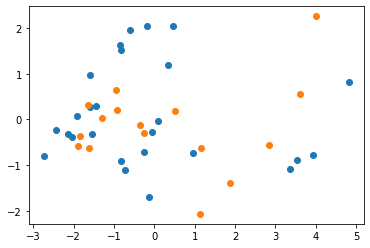

In [50]:
plt.scatter(p_emb[: boy.size(0), 0], p_emb[: boy.size(0), 1])
plt.scatter(p_emb[boy.size(0): , 0], p_emb[boy.size(0): , 1])

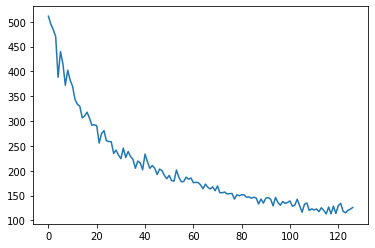

In [51]:
plt.plot(ckpt['losses'])

In [12]:

model = Speech2Vec().float()
ckpt = torch.load('ckpt/1.pt')
model.load_state_dict(ckpt['state_dict'])
word = get_embedding('HE', model, mapper, method='all')

std = word.std(dim=0).mean()
std

tensor(0.3822)

In [13]:
word.is_cuda

False

In [53]:
0.3659 tensor(0.3697)


In [51]:
girl.shape

torch.Size([6, 50])

[tensor(0.3035),
 tensor(0.2907),
 tensor(0.3030),
 tensor(0.2939),
 tensor(0.2963)]

[tensor(0.3005),
 tensor(0.2878),
 tensor(0.3000),
 tensor(0.2910),
 tensor(0.2934)]